## Model Building with MNIST Data

### Importing required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### Reading and understanding data

In [3]:
# Import the fetch_openml function from sklearn.datasets
from sklearn.datasets import fetch_openml

# Load the MNIST dataset using fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [6]:
df = pd.DataFrame(mnist.data, columns=mnist.feature_names)
df['label'] = mnist.target
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [7]:
df.shape

(70000, 785)

In [8]:
null_val = df.isnull().sum()
null_val[null_val>0]

,0


In [9]:
dup_val = df.duplicated().sum()
dup_val[dup_val>0]

array([], dtype=int64)

### Splitting and scaling of data

In [10]:
df_train,df_test = train_test_split(df,test_size=0.3,random_state=42)
df_train.shape,df_test.shape

((49000, 785), (21000, 785))

In [11]:
X_train = df_train.drop('label',axis=1)
y_train = df_train['label']

X_test = df_test.drop('label',axis=1)
y_test = df_test['label']

In [12]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((49000, 784), (49000,), (21000, 784), (21000,))

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Building

#### Using Logistic Regression

In [14]:
%%time
lr = LogisticRegression()
lr.fit(X_train,y_train)

CPU times: user 44.4 s, sys: 5.55 s, total: 49.9 s
Wall time: 29.9 s


LogisticRegression()

In [15]:
y_test_pred_lr = lr.predict(X_test)
print(accuracy_score(y_test,y_test_pred_lr))

0.9136666666666666


#### Using Decision Tree

In [ ]:
%%time
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

CPU times: user 22 s, sys: 67.2 ms, total: 22 s
Wall time: 27.4 s


DecisionTreeClassifier(random_state=42)

In [ ]:
y_test_pred_dt = lr.predict(X_test)
print(accuracy_score(y_test,y_test_pred_dt))

0.9136666666666666


#### Using Random Forest

In [ ]:
%%time
rfc = RandomForestClassifier(random_state=42,n_estimators=50)
rfc.fit(X_train,y_train)

CPU times: user 24.9 s, sys: 168 ms, total: 25 s
Wall time: 27.6 s


RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
y_test_pred_rfc = lr.predict(X_test)
print(accuracy_score(y_test,y_test_pred_rfc))

0.9136666666666666


#### Using GridSearchCV

In [ ]:
#rf = RandomForestClassifier(random_state=42)

In [ ]:
#params = {
#     'max_depth' : [5,10,15],
#     'n_estimators' : [100,150,200],
#     'min_samples_leaf' : [1,2,5]
#}

In [ ]:
#%%time
#grid_search = GridSearchCV(estimator = rf, param_grid = params, cv = 5, verbose = 1, n_jobs = -1)
#grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
#grid_search.best_params_

In [ ]:
#grid_search.best_estimator_

In [ ]:
#grid_search.best_score_

In [ ]:
#grid_best = grid_search.best_estimator_

#y_test_pred_grid = grid_best.predict(X_test)
#print(accuracy_score(y_test,y_test_pred_grid))

#### Using RandomizedSearchCV

In [14]:
#rf = RandomForestClassifier(random_state=42)

In [17]:
# params = {
#     'max_depth' : [5,10,15],
#     'n_estimators' : [100,150,200],
#     'min_samples_leaf' : [1,2,5]
# }

In [ ]:
# %%time
# random_search = RandomizedSearchCV(estimator = rf, param_distributions = params, cv = 5, verbose = 1,
#                                    n_jobs = -1, n_iter = 10)
# random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
#random_search.best_params_

In [ ]:
#random_search.best_estimator_

In [ ]:
#random_search.best_score_

In [ ]:
#random_best = grid_search.best_estimator_

#y_test_pred_grid = random_best.predict(X_test)
#print(accuracy_score(y_test,y_test_pred_grid))

#### Using PCA

In [16]:
pca = PCA(random_state = 42)

In [17]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [18]:
var = pca.explained_variance_ratio_
var

array([5.70265196e-02, 4.07554317e-02, 3.75779984e-02, 2.91856689e-02,
       2.54009381e-02, 2.20561352e-02, 1.93217886e-02, 1.76505655e-02,
       1.53987509e-02, 1.40388033e-02, 1.35081377e-02, 1.21821186e-02,
       1.12876061e-02, 1.10533439e-02, 1.03895951e-02, 1.00154084e-02,
       9.44585129e-03, 9.26380378e-03, 8.92419606e-03, 8.68871098e-03,
       8.26988700e-03, 8.04641873e-03, 7.69255656e-03, 7.48098303e-03,
       7.22434312e-03, 6.94883316e-03, 6.84715542e-03, 6.67564094e-03,
       6.38142843e-03, 6.15058388e-03, 6.06028520e-03, 5.95217052e-03,
       5.69544760e-03, 5.62507554e-03, 5.58651898e-03, 5.40199334e-03,
       5.27591811e-03, 5.23270822e-03, 5.18792479e-03, 4.85172646e-03,
       4.81538535e-03, 4.71429932e-03, 4.62267368e-03, 4.49899574e-03,
       4.45364624e-03, 4.43446852e-03, 4.37803164e-03, 4.34624490e-03,
       4.22573998e-03, 4.15252402e-03, 4.08771225e-03, 4.03496143e-03,
       4.01191181e-03, 3.92497860e-03, 3.81652736e-03, 3.77245354e-03,
      

In [19]:
pca.components_

array([[ 7.27475332e-19,  0.00000000e+00,  1.11022302e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.20206572e-19,  1.66533454e-16,  5.55111512e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.40556403e-19,  1.11022302e-16,  8.32667268e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [-0.00000000e+00,  1.28600675e-01, -9.57807273e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00,  8.44496791e-02, -1.30654208e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00,  1.40045623e-01, -2.69143398e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

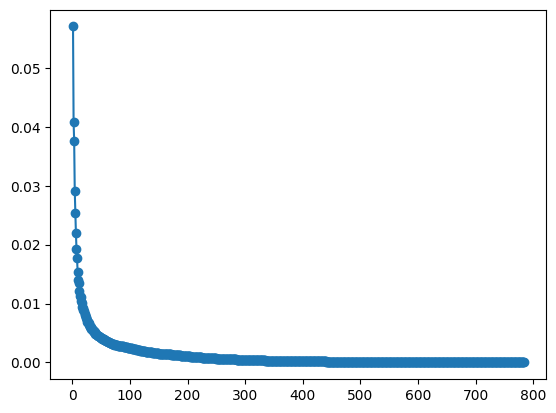

In [20]:
#Scree plot
plt.plot(range(1,len(var)+1), var, marker='o')
plt.show()

In [21]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.05702652, 0.09778195, 0.13535995, 0.16454562, 0.18994656,
       0.21200269, 0.23132448, 0.24897505, 0.2643738 , 0.2784126 ,
       0.29192074, 0.30410286, 0.31539046, 0.32644381, 0.3368334 ,
       0.34684881, 0.35629466, 0.36555847, 0.37448266, 0.38317137,
       0.39144126, 0.39948768, 0.40718023, 0.41466122, 0.42188556,
       0.42883439, 0.43568155, 0.44235719, 0.44873862, 0.4548892 ,
       0.46094949, 0.46690166, 0.47259711, 0.47822218, 0.4838087 ,
       0.48921069, 0.49448661, 0.49971932, 0.50490724, 0.50975897,
       0.51457436, 0.51928866, 0.52391133, 0.52841033, 0.53286397,
       0.53729844, 0.54167647, 0.54602272, 0.55024846, 0.55440098,
       0.55848869, 0.56252365, 0.56653557, 0.57046054, 0.57427707,
       0.57804953, 0.58178964, 0.5854405 , 0.58906216, 0.59263125,
       0.59616048, 0.59962218, 0.60308002, 0.60647777, 0.60984423,
       0.61317668, 0.61647224, 0.61969306, 0.62287614, 0.62602408,
       0.62915027, 0.63223722, 0.63526898, 0.63828908, 0.64128

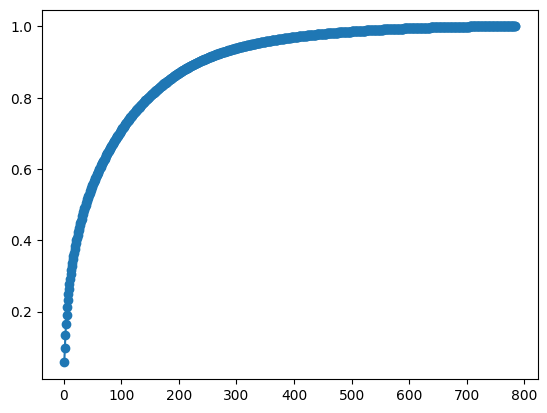

In [22]:
plt.plot(range(1,len(cumsum)+1), cumsum, marker='o')
plt.show()

**We can observe that for 350 components, we can see that we have 92+ percentage of variance.**



##### Best-fit of PCA using components

In [23]:
pca_best = PCA(n_components=350, random_state=42)

X_train_pca = pca_best.fit_transform(X_train)
X_test_pca = pca_best.transform(X_test)

In [24]:
%%time
lr = LogisticRegression()
lr.fit(X_train_pca,y_train)

LogisticRegression()

In [25]:
y_test_pred = lr.predict(X_test_pca)
print(accuracy_score(y_test,y_test_pred))

0.9213809523809524


##### Best-fit of PCA using Threshold value

In [26]:
pca_best = PCA(0.9677)

X_train_pca = pca_best.fit_transform(X_train)
X_test_pca = pca_best.transform(X_test)

In [27]:
%%time
lr = LogisticRegression()
lr.fit(X_train_pca,y_train)

CPU times: user 20.1 s, sys: 5.79 s, total: 25.9 s
Wall time: 22.7 s


LogisticRegression()

In [28]:
y_test_pred = lr.predict(X_test_pca)
print(accuracy_score(y_test,y_test_pred))

0.922
